In [1]:
import os

import tifffile
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
from einops import rearrange

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.registration import warp_image

In [5]:
fixed = tifffile.imread(
    '/data/estorrs/mushroom/data/test_registration/HT397B1/slices_unregistered/s0_HT397B1-S1H3A1U1_rgb.tif')
moving = tifffile.imread(
    '/data/estorrs/mushroom/data/test_registration/HT397B1/slices_unregistered/s1_HT397B1-S1H3A1U2_codex.tif'
)
fixed = torch.tensor(rearrange(fixed, 'h w c -> c h w'))
moving = torch.tensor(rearrange(moving, 'h w c -> c h w'))
fixed.shape, moving.shape

(torch.Size([3, 1573, 1551]), torch.Size([3, 1728, 1632]))

In [11]:
ddf = tifffile.imread('/data/estorrs/mushroom/data/test_registration/HT397B1/ddfs/s1.tiff')
order = [1, 0] # needs to be h then w
ddf = torch.tensor(ddf[order])
ddf.shape

torch.Size([2, 1573, 1551])

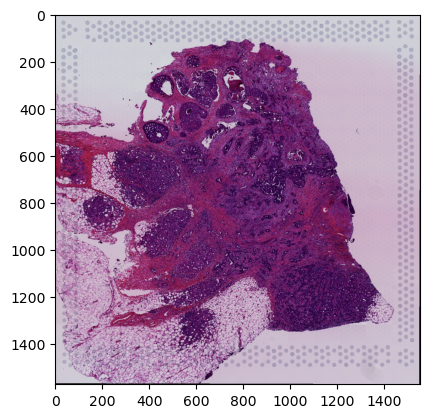

In [7]:
plt.imshow(rearrange(fixed, 'c h w -> h w c'))

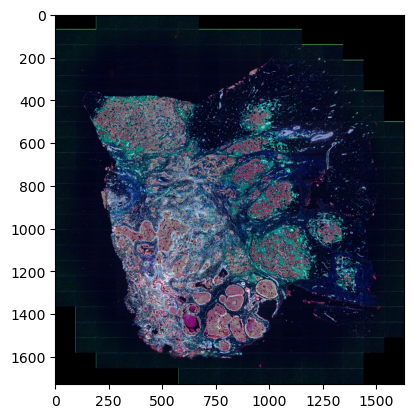

In [8]:
plt.imshow(rearrange(moving, 'c h w -> h w c'))

0 tensor(1819.8057) tensor(-1483.3011)


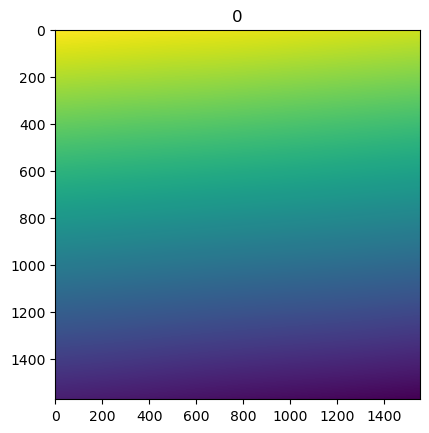

1 tensor(1563.0701) tensor(-1727.3062)


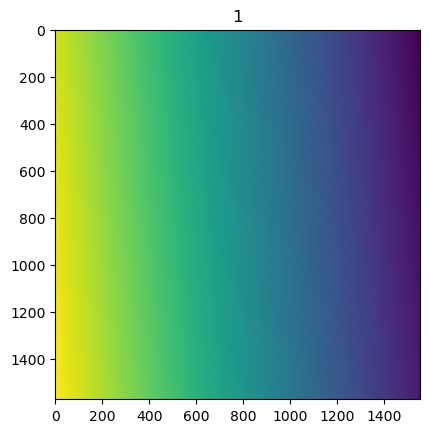

In [12]:
for i in range(ddf.shape[0]):
    print(i, ddf[i].max(), ddf[i].min())
    plt.imshow(ddf[i])
    plt.title(i)
    plt.show()

In [17]:
moving.shape, fixed.shape, ddf.shape

(torch.Size([3, 1728, 1632]),
 torch.Size([3, 1573, 1551]),
 torch.Size([2, 1573, 1551]))

In [15]:
warped = warp_image(moving, ddf.shape, ddf)

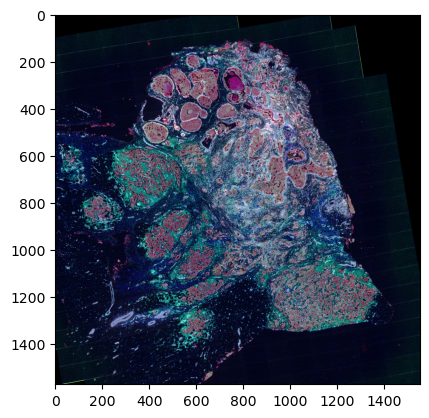

In [16]:
plt.imshow(rearrange(warped, 'c h w -> h w c'))

In [26]:
# try with downsampled displacement
scale = .1
ddf *= scale
ddf = TF.resize(ddf, (int(ddf.shape[-2] * scale), int(ddf.shape[-1] * scale)))
ddf.shape

torch.Size([2, 1573, 1551])

In [27]:
ddf.max(), ddf.min()

(tensor(1827.0540), tensor(-1736.3585))

In [22]:
ddf = TF.resize(ddf, fixed.shape[-2:])
ddf /= scale
ddf.shape

torch.Size([2, 15738, 15514])

In [23]:
warped = warp_image(moving, fixed, ddf)

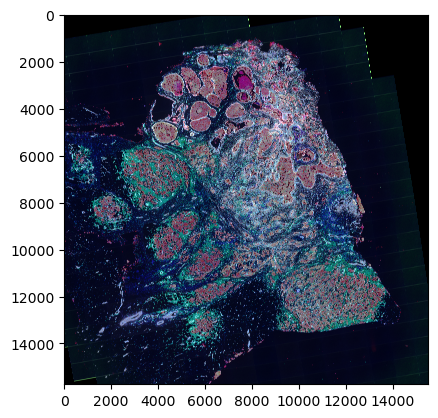

In [24]:
plt.imshow(rearrange(warped, 'c h w -> h w c'))